### Лаб. Раб. №1. Елисеев А. Ю.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy
import statistics


В данном разделе выбраны данные, представленные на сайте Росстата https://rosstat.gov.ru/statistics/science В таблице содержатся данные, проливающие свет на распространенность серверных технологий в сфере по обслуживанию средств передвижения.

In [50]:
df2 = pd.read_csv("Wholesale and retail trade; repair of motor vehicles, motorcycles.csv")
df2

,number of servers,year
0,58.0,2017
1,53.9,2018
2,53.5,2019
3,36.1,2020
4,37.4,2021
5,37.2,2022
6,32.2,2023


In [51]:
# Расчет медианы и среднего значения для колонки кол-ва использующихся в сфере серверов
serv = df2['number of servers']
serv_mean, serv_median = serv.mean(), serv.median()
print(f'Среднее: {serv_mean}, Медиана: {serv_median}.')

Среднее: 44.042857142857144, Медиана: 37.4.


In [52]:
# Расчет моды
if serv.is_unique != True:
    print(f'Мода: {df2.mode()}')
else:
    print('Так как все значения в колонке уникальны, значит, среди выбранных данных нет моды.')
    

Так как все значения в колонке уникальны, значит, среди выбранных данных нет моды.


<BarContainer object of 7 artists>

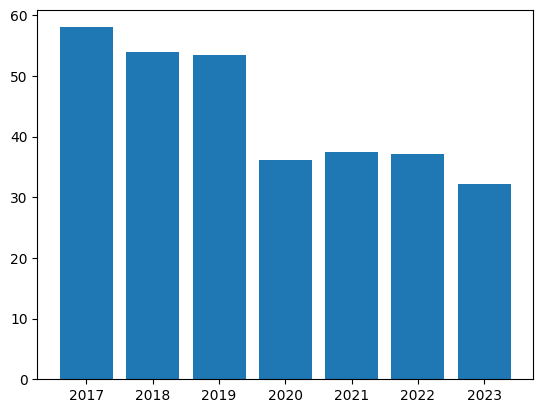

In [53]:
# Распределение со смещенной медианой относительно среднего (~15% размаха) 
plt.bar(df2[' year'], df2['number of servers'])

В данном пункте представлены индексы общественного здоровья, разделенные по странам и годам. https://github.com/pycaret/pycaret/blob/master/datasets/public_health.csv

In [54]:
df3 = pd.read_csv('public_health.csv')
# df3 = pd.read_csv("diamond (1).csv")
display(df3.head())
df3.shape

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Arab World,2.004868,2.014602,2.071309,2.177712,2.331000,2.333596,2.588751,2.540238,2.450415,...,2.134281,2.133038,2.166872,2.101233,2.830067,2.489631,2.539570,2.711262,2.895427,3.073161
1,Caribbean small states,2.801518,2.856684,2.997157,2.989451,2.767858,2.826752,2.679969,2.888693,2.740593,...,2.629580,2.650900,2.790665,2.822913,3.408651,3.264064,3.087653,3.314303,3.318432,3.260012
2,Central Europe and the Baltics,4.678528,4.753209,4.604574,4.499988,4.679082,4.539711,4.666272,4.900196,5.100249,...,4.970861,4.841450,4.809057,5.054785,5.394921,5.284380,5.096212,5.041317,5.029266,5.017717
3,Early-demographic dividend,2.203164,2.156632,2.227311,2.364100,2.454394,2.450555,2.527081,2.347702,2.363263,...,2.337347,2.369884,2.385251,2.405126,2.701260,2.507131,2.495491,2.497340,2.586701,2.665603
4,East Asia & Pacific,4.429090,4.203152,4.244351,4.453984,4.626920,4.688849,4.684790,4.613537,4.635098,...,4.566215,4.367146,4.297394,4.434848,4.865241,4.775817,4.871727,4.866869,4.643221,4.571448


(224, 21)

 Минимальное анамальное значение: 9.359712228
 Максимальное анамальное значение: 19.25675216
 Всего анамальных значений: 5
 Квартили: 2.1685375447500004, 3.155371392, 4.8502750277499995


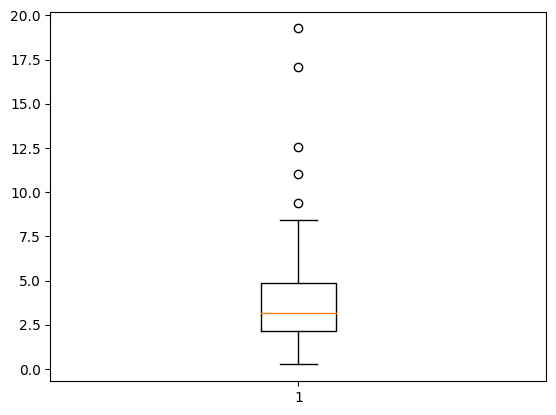

In [55]:
ex = plt.boxplot(x=(df3['2006']))# построения ящика с усами по данным за 2006 год
# Выявление аномальных значений
ex = [flier.get_ydata() for flier in ex["fliers"]][0]
print(f' Минимальное анамальное значение: {ex.min()}\n', 
      f'Максимальное анамальное значение: {ex.max()}\n',
      f'Всего анамальных значений: {len(ex)}')
# Квартили
q1, q2, q3 = np.percentile(df3['2006'], [25, 50, 75])
print(f' Квартили: {q1}, {q2}, {q3}')


In [56]:
# Анамаьлные значения за 2006 год
df3[df3['2006'] >= ex.min()]

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
125,Kiribati,8.968471,8.797772,8.983000,6.656954,8.444217,7.582920,8.491803,8.563910,9.467626,...,9.460432,9.359712,11.400771,10.311665,10.364765,8.725610,8.568862,8.313609,8.232914,8.291027
143,Marshall Islands,28.049785,16.678893,17.168133,15.645230,15.427423,19.240433,16.071970,14.835146,14.211288,...,14.679710,17.055556,17.592000,16.481699,16.028947,14.398171,14.271676,13.906522,14.551898,14.449168
147,"Micronesia, Fed. Sts.",8.696186,8.135027,7.277088,6.462138,7.064857,7.353310,8.006994,7.414074,9.029863,...,11.311200,11.033992,11.135547,11.695402,12.173285,12.610782,12.538215,11.588139,12.089938,12.433752
156,Nauru,12.334931,11.594284,11.826019,12.564985,12.337984,12.547686,13.312807,14.535418,13.454671,...,11.617775,12.576337,18.102824,15.606703,8.727534,8.454552,7.110557,6.523966,4.192164,2.867666
211,Tuvalu,7.960186,11.274663,8.087747,8.614015,9.221983,15.666667,17.269231,14.386207,21.654094,...,18.234377,19.256752,16.856098,13.268344,12.693344,16.628571,16.842105,13.641026,16.475000,16.404762


Возможно, высокие показатели индексов данных стран связаны с немногочисленностью проживающего на территории стран населения.

In [57]:
# Другие значения, полученные в результате анализа данных за 2006 год
price = df3['2006']
sr=price.mean()
med=price.median()
pmode=statistics.mode(price)
std=statistics.stdev(price)
disp=statistics.variance(price)
skew=stats.skew(price)
print(f'Среднее значение={sr}, Медиана={med}, Мода={pmode}, Стандартное отклонение={std}, Дисперсия={disp}, Асимметрия={skew}')

Среднее значение=3.754351593758929, Медиана=3.155371392, Мода=1.875267093, Стандартное отклонение=2.4726469757264415, Дисперсия=6.1139830665691175, Асимметрия=2.3121748546123815


ShapiroResult(statistic=0.8231955894111848, pvalue=3.061028276062682e-15)

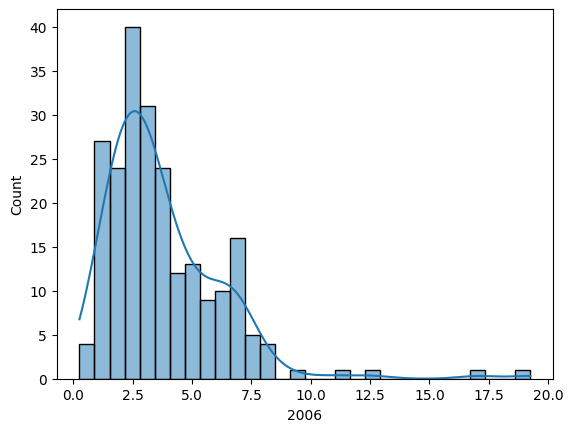

In [58]:
sns.histplot(df3['2006'], kde = True, bins = 30)
stats.shapiro(df3['2006'])#тест Шапиро-Уилка для проверки нормальности данных


ShapiroResult(statistic=0.9876457645640716, pvalue=0.050109876066363156)

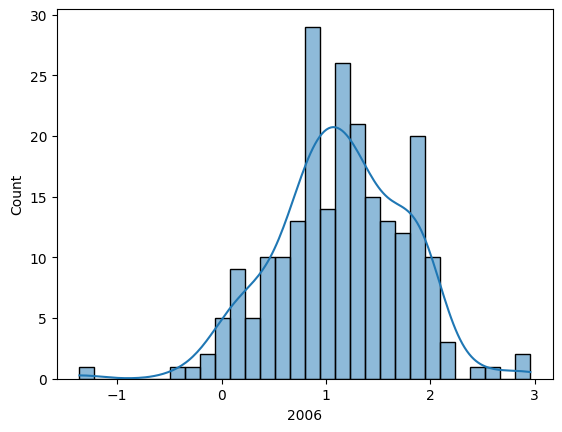

In [59]:
# логорифмируем данные и получаем более равномерное распределение
s = np.log(df3['2006'])
sns.histplot(s, kde=True, bins=30)
stats.shapiro(s)# тест Шапиро-Уилка для проверки нормальности данных

Среднее: 4.5733196494, Медиана: 4.6201167425000005


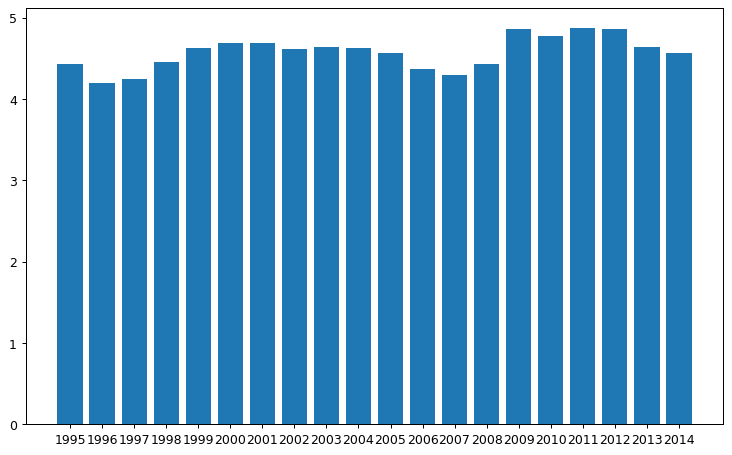

In [60]:
# Пример равномерного распределения
eap = df3[df3['Country Name']== 'East Asia & Pacific'].values.tolist()
years = df3.columns.to_list()
del years[0]
eap=eap[0][1:]
eap_mean = sum(eap) / len(eap)
eap_median = statistics.median(eap)
plt.figure(figsize=(10, 6), dpi=90)
plt.bar(years, eap)
print(f"Среднее: {eap_mean}, Медиана: {eap_median}")